In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

from fcmeans import FCM

In [2]:
data = pd.read_csv("top10s.csv", encoding='ISO-8859-1')
display(data)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 63.7+ KB


In [4]:
data["top genre"].value_counts().head()

dance pop        327
pop               60
canadian pop      34
boy band          15
barbadian pop     15
Name: top genre, dtype: int64

In [5]:
data["top genre"].nunique()

50

In [6]:
data["artist"].value_counts().head()

Katy Perry       17
Justin Bieber    16
Rihanna          15
Maroon 5         15
Lady Gaga        14
Name: artist, dtype: int64

In [7]:
data = data.drop(columns="Unnamed: 0")

In [8]:
data["top_genre_obj"] = data["top genre"].astype('category')
data.dtypes

title              object
artist             object
top genre          object
year                int64
bpm                 int64
nrgy                int64
dnce                int64
dB                  int64
live                int64
val                 int64
dur                 int64
acous               int64
spch                int64
pop                 int64
top_genre_obj    category
dtype: object

In [9]:
data["top genre cat"] = data["top_genre_obj"].cat.codes

In [10]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,neo mellow,46
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,detroit hip hop,27
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,dance pop,25
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,dance pop,25
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop,48


In [11]:
data["artist"] = data["artist"].astype('category')
data.dtypes

title              object
artist           category
top genre          object
year                int64
bpm                 int64
nrgy                int64
dnce                int64
dB                  int64
live                int64
val                 int64
dur                 int64
acous               int64
spch                int64
pop                 int64
top_genre_obj    category
top genre cat        int8
dtype: object

In [12]:
data["artist_cat"] = data["artist"].cat.codes

In [13]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat,artist_cat
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,neo mellow,46,174
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,detroit hip hop,27,49
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,dance pop,25,89
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,dance pop,25,94
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop,48,19


In [14]:
data["artist"].nunique()

184

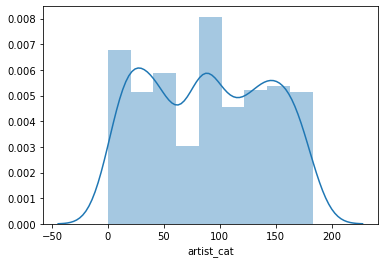

In [15]:
sns.distplot(data['artist_cat'])

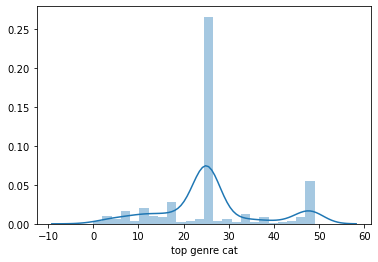

In [16]:
sns.distplot(data['top genre cat'])

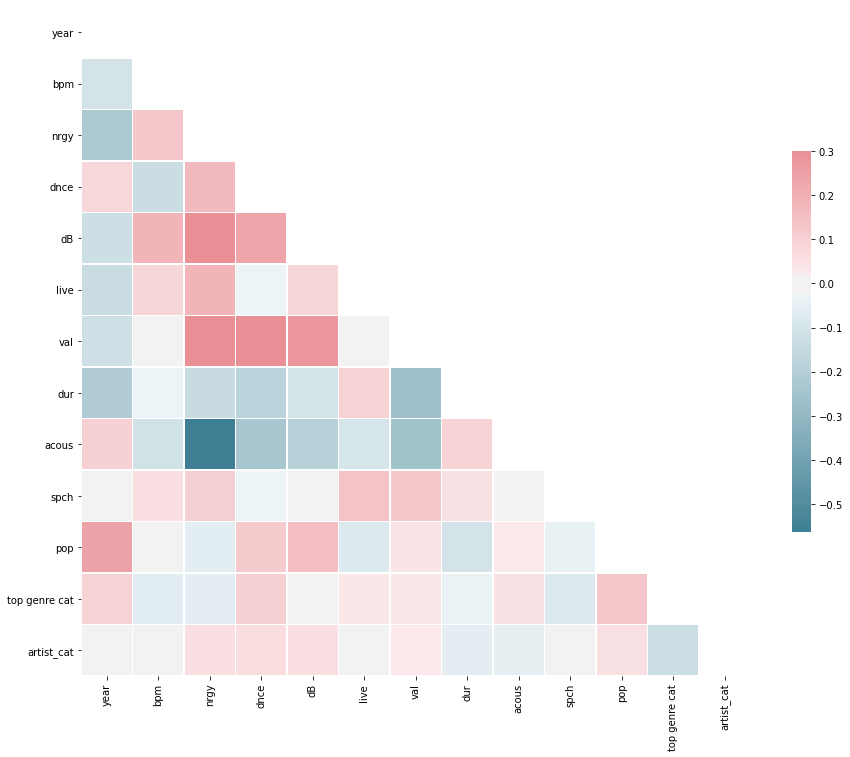

In [17]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})



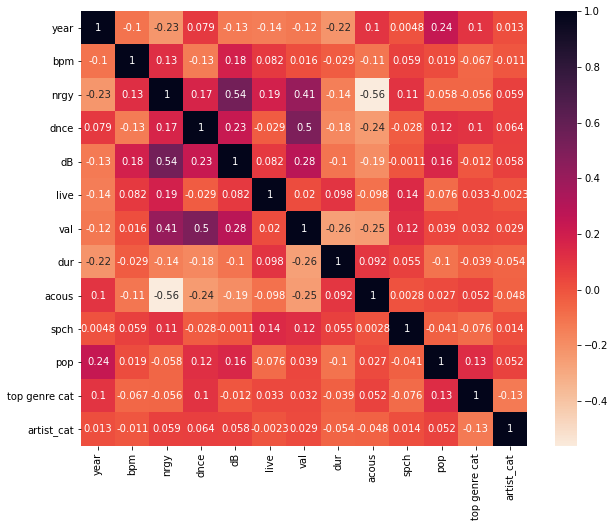

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap = sns.cm.rocket_r)

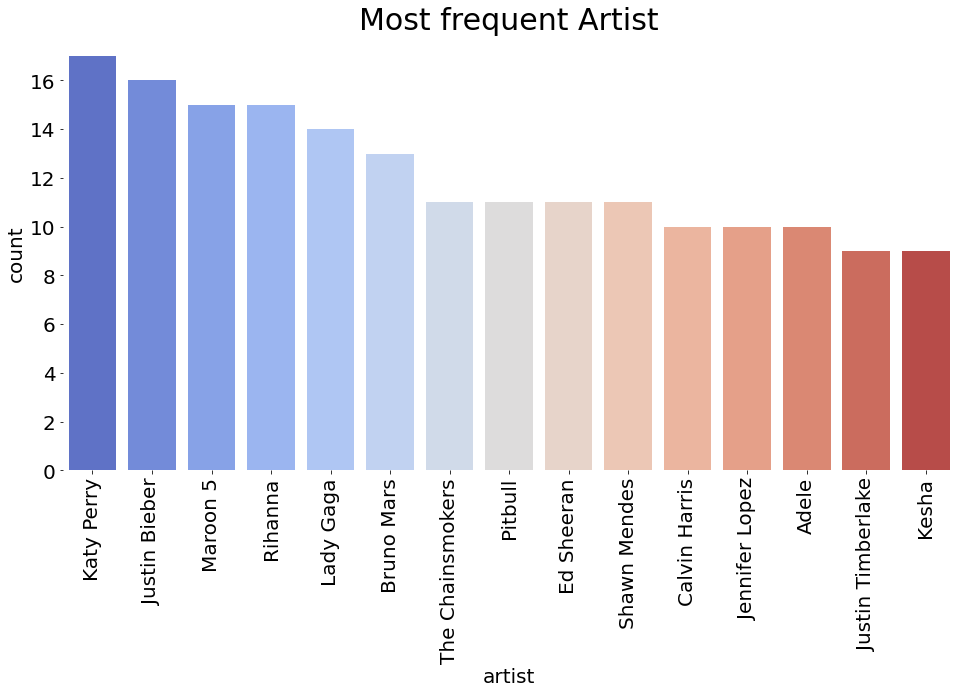

In [19]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Artist',fontsize=30)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.artist,order=pd.value_counts(data.artist).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

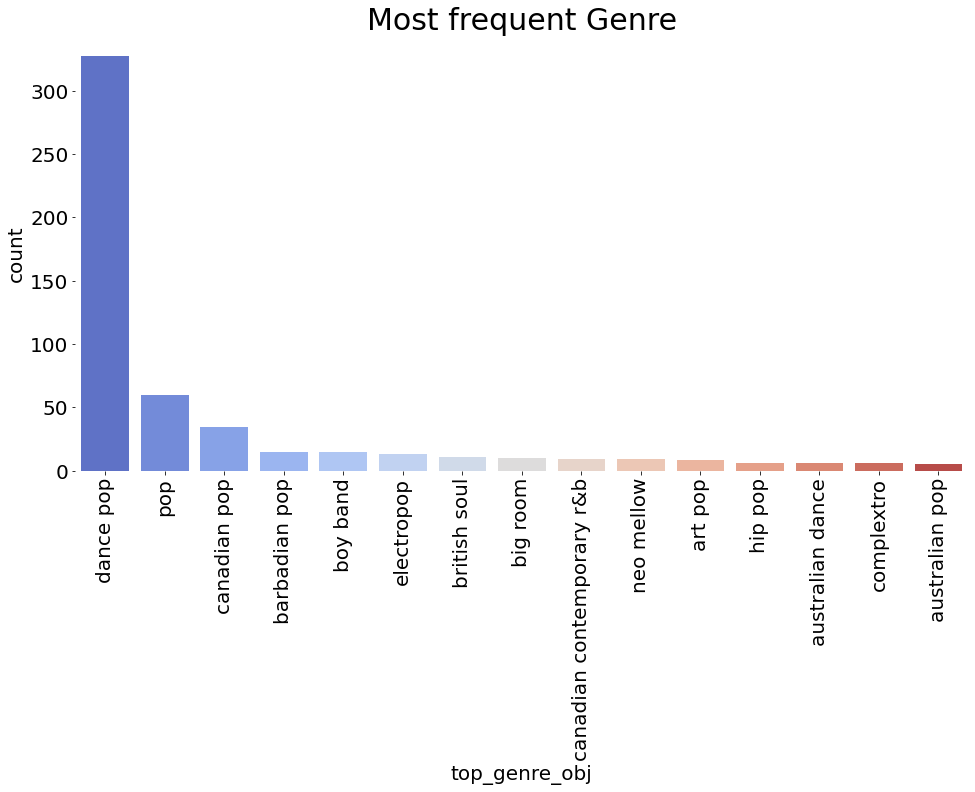

In [20]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Genre',fontsize=30)
plt.xlabel('top genre', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.top_genre_obj,order=pd.value_counts(data.top_genre_obj).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

<ipython-input-21-c66049f073bc>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


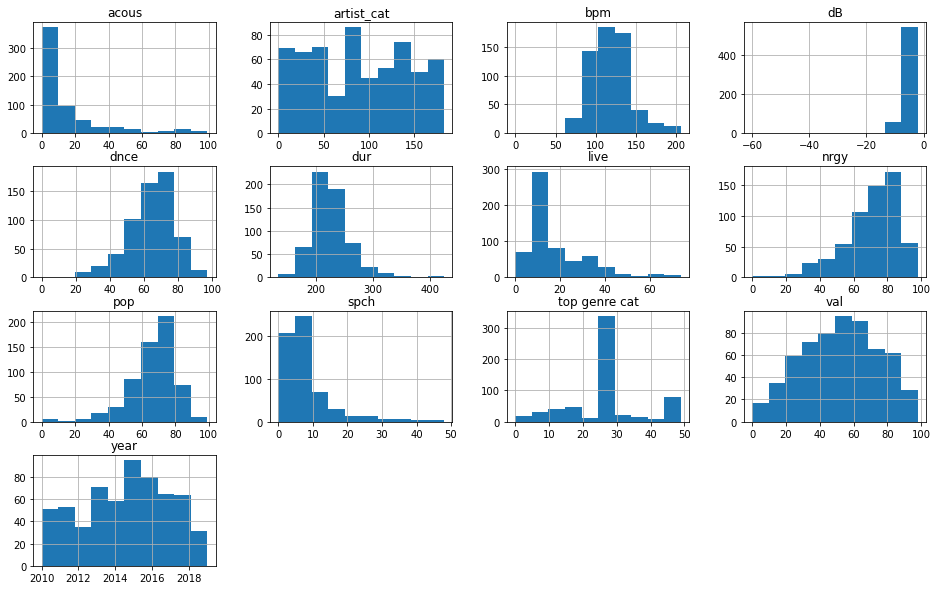

In [21]:
fig = plt.figure(figsize = (16,10))
ax = fig.gca()
data.hist(ax = ax)
plt.style.use('ggplot')

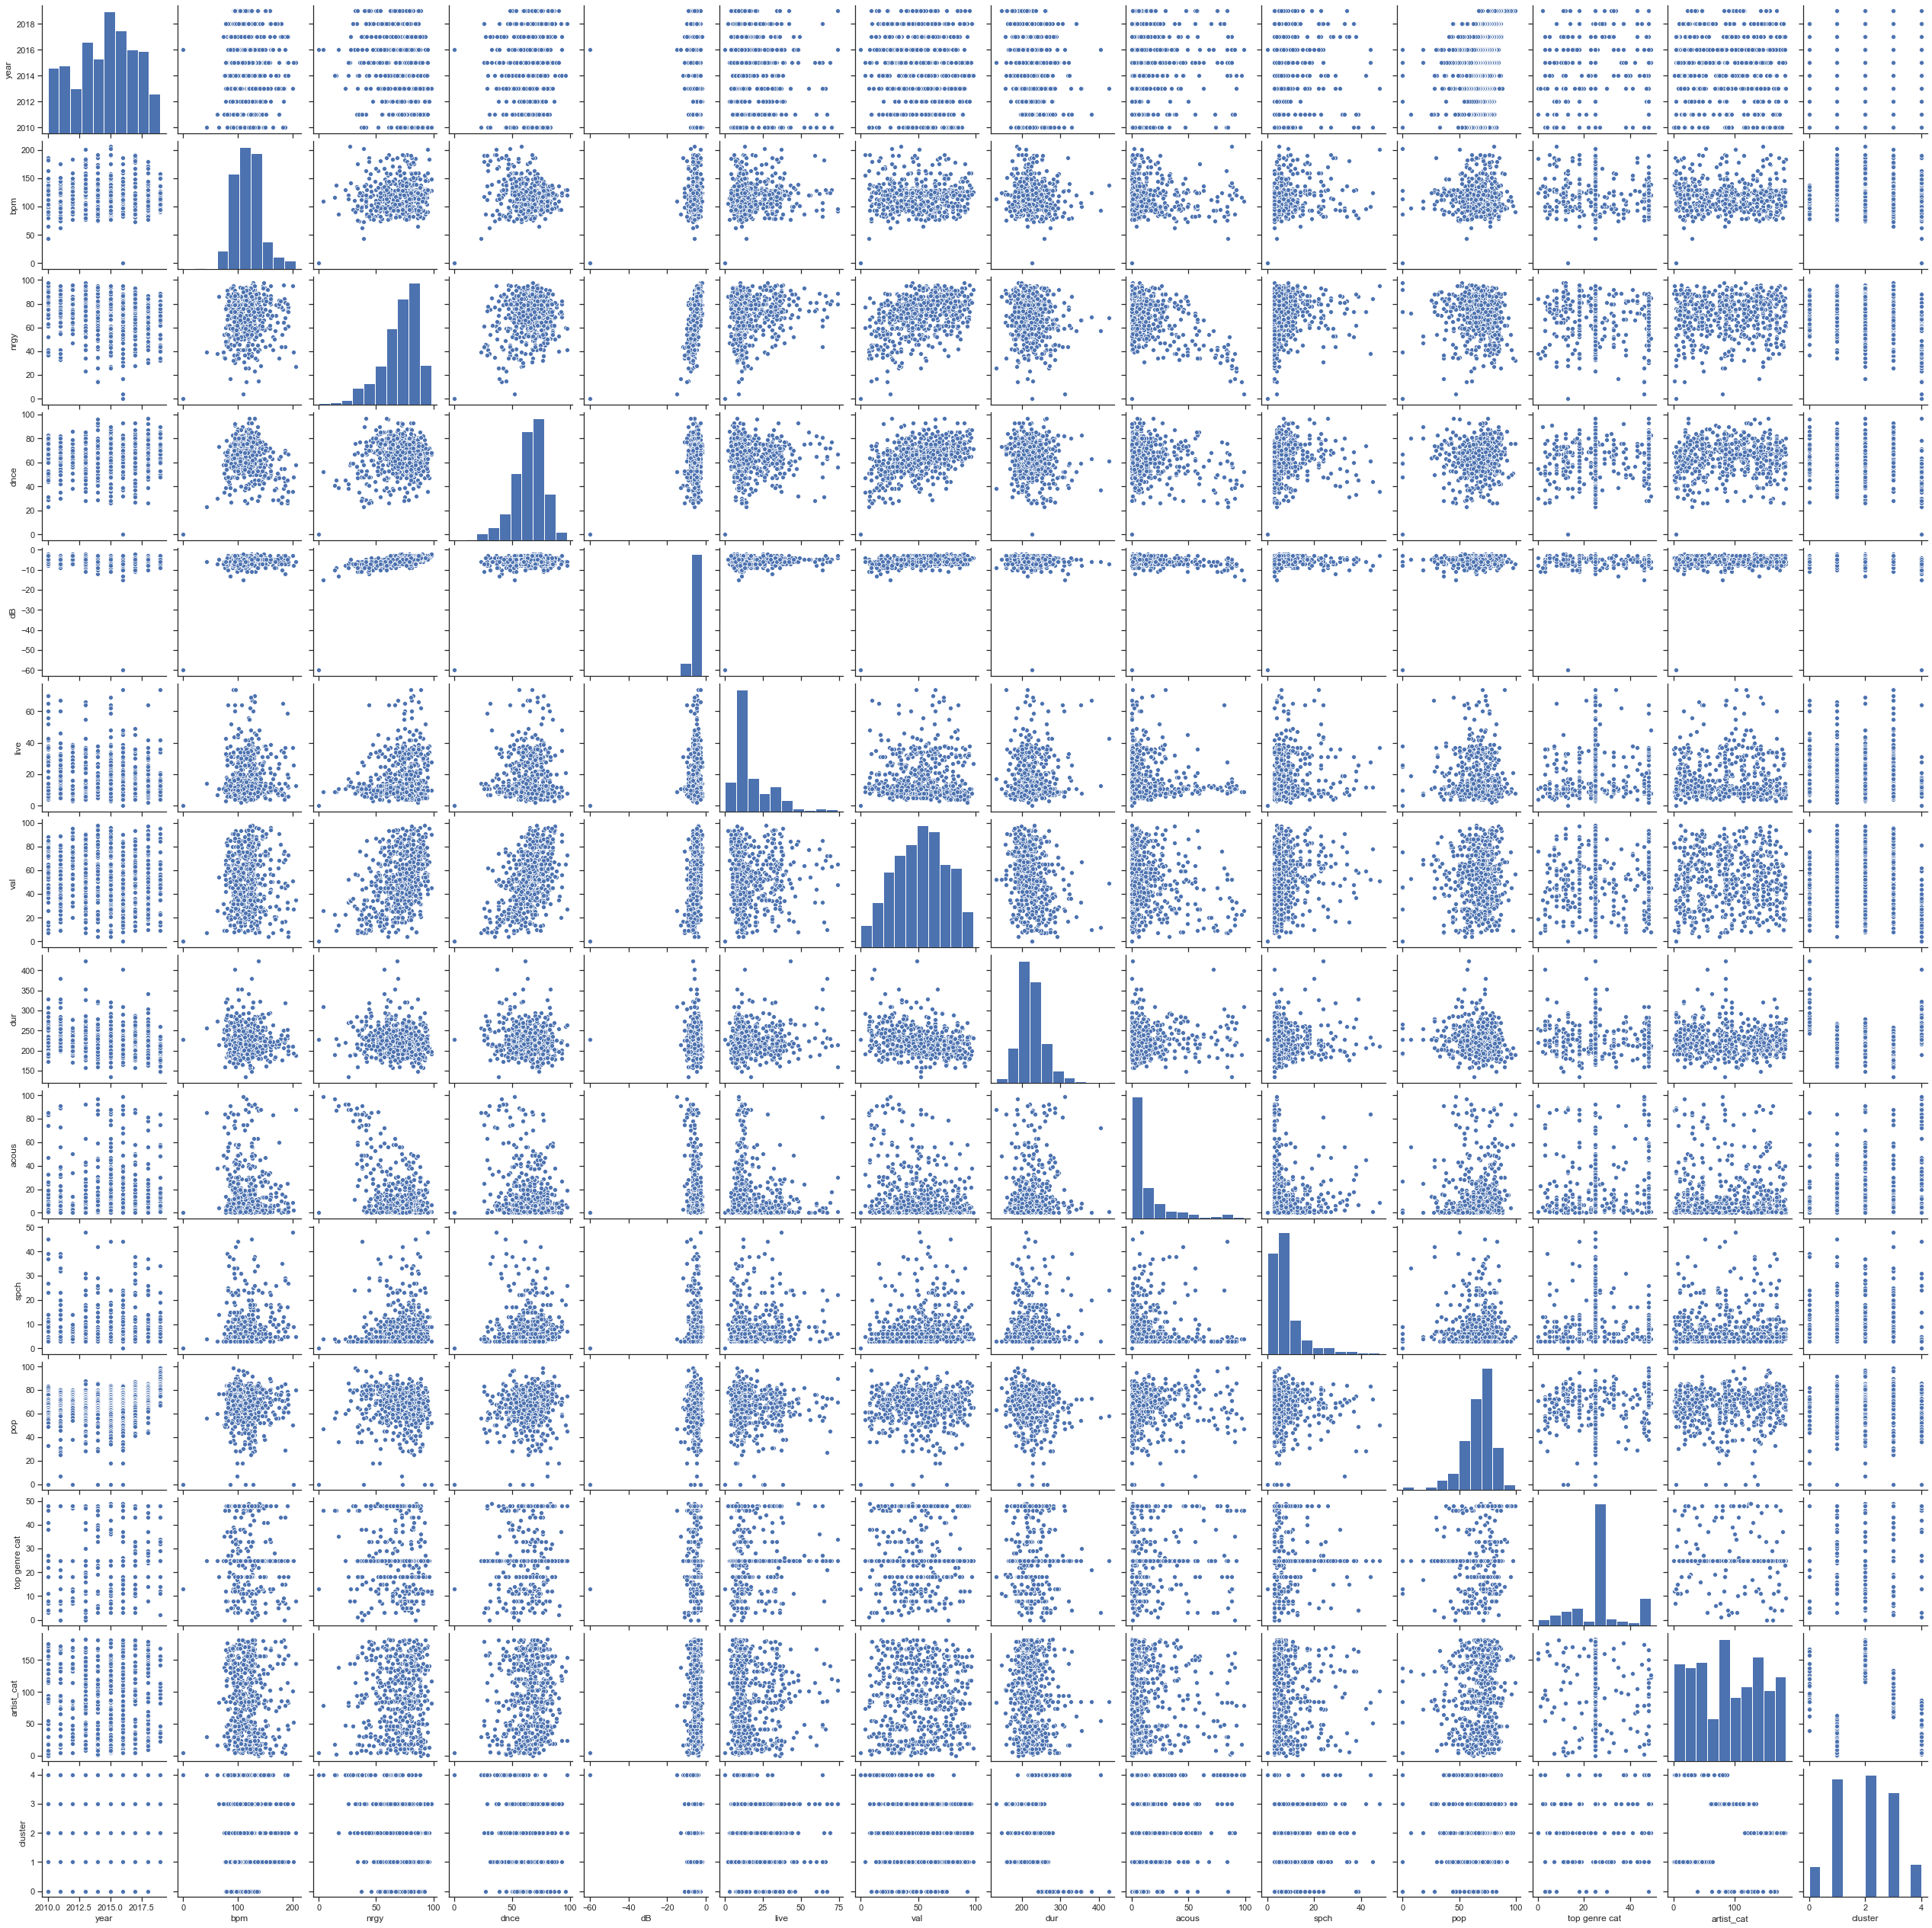

In [31]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

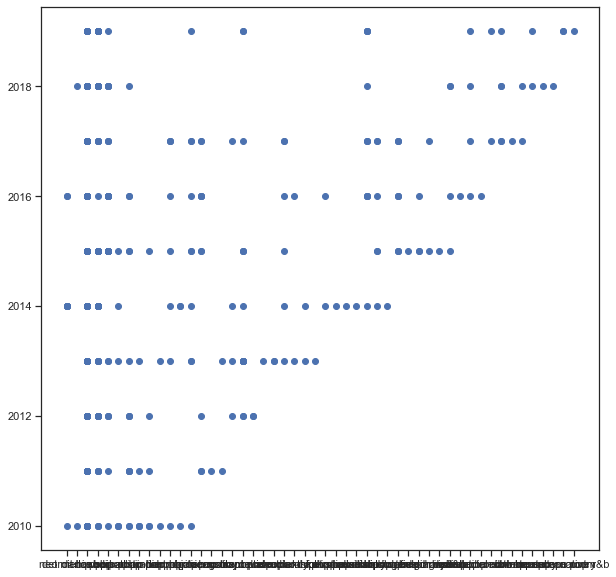

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(data['top_genre_obj'], data['year'])

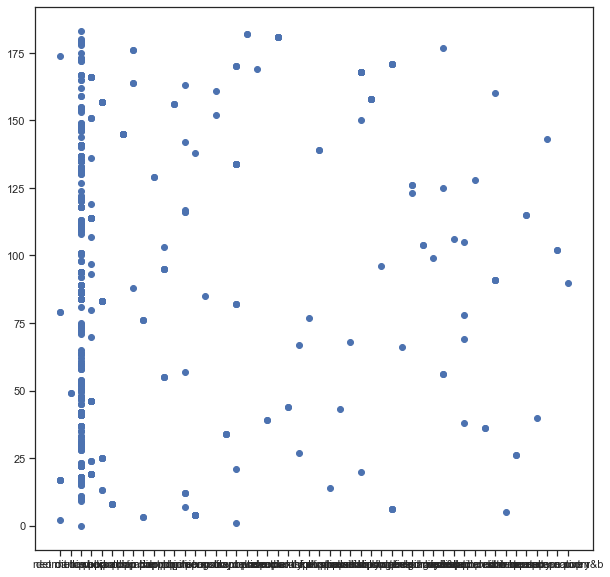

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(data['top_genre_obj'], data['artist_cat'])

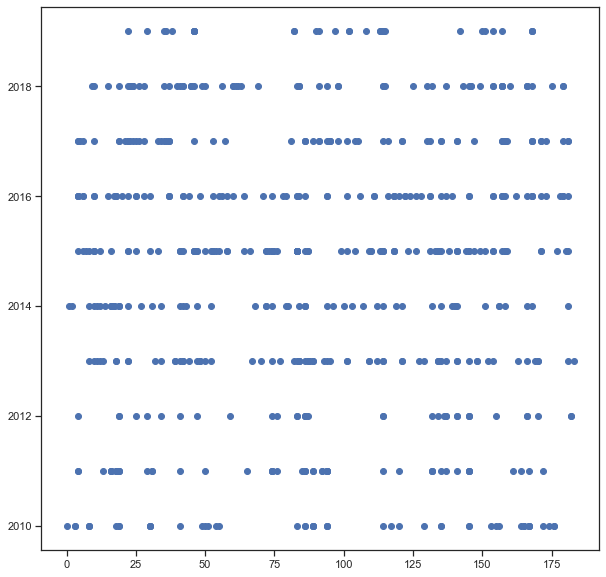

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(data['artist_cat'], data['year'])

# Clustering

In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   title          603 non-null    object  
 1   artist         603 non-null    category
 2   top genre      603 non-null    object  
 3   year           603 non-null    int64   
 4   bpm            603 non-null    int64   
 5   nrgy           603 non-null    int64   
 6   dnce           603 non-null    int64   
 7   dB             603 non-null    int64   
 8   live           603 non-null    int64   
 9   val            603 non-null    int64   
 10  dur            603 non-null    int64   
 11  acous          603 non-null    int64   
 12  spch           603 non-null    int64   
 13  pop            603 non-null    int64   
 14  top_genre_obj  603 non-null    category
 15  top genre cat  603 non-null    int8    
 16  artist_cat     603 non-null    int16   
dtypes: category(2), int16(1), int64(11)

In [27]:
col = ['year', 'bpm','nrgy', 'dnce','dB', 'live','val','dur','acous','spch','pop','top genre cat', 'artist_cat']
X = data[col].astype('int64')
X.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre cat,artist_cat
0,2010,97,89,67,-4,8,80,217,19,4,83,46,174
1,2010,87,93,75,-5,52,64,263,24,23,82,27,49
2,2010,120,84,76,-3,29,71,200,10,14,80,25,89
3,2010,119,92,70,-4,8,71,295,0,4,79,25,94
4,2010,109,84,64,-5,9,43,221,2,4,78,48,19


In [28]:
k_means = KMeans(n_clusters=5)
pred_label = k_means.fit_predict(X)
pred_label

array([2, 1, 3, 0, 1, 3, 2, 2, 4, 2, 1, 1, 3, 3, 1, 2, 2, 0, 0, 3, 0, 1,
       3, 3, 2, 2, 2, 1, 3, 3, 1, 1, 3, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2, 2,
       4, 1, 2, 2, 0, 2, 3, 4, 4, 2, 1, 1, 1, 3, 1, 1, 3, 1, 0, 0, 1, 4,
       0, 3, 3, 2, 2, 0, 2, 1, 1, 3, 0, 3, 1, 1, 3, 0, 3, 1, 3, 2, 0, 4,
       1, 3, 3, 0, 2, 2, 4, 0, 2, 2, 2, 3, 0, 3, 3, 2, 1, 1, 4, 3, 2, 2,
       1, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 1, 1,
       2, 2, 2, 2, 1, 4, 0, 3, 1, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 1, 2, 3,
       2, 3, 1, 3, 1, 2, 3, 1, 0, 1, 2, 3, 2, 0, 0, 3, 2, 1, 0, 2, 3, 1,
       3, 3, 1, 3, 2, 1, 0, 0, 1, 1, 4, 4, 0, 2, 3, 2, 4, 1, 0, 3, 4, 1,
       3, 3, 3, 3, 1, 0, 1, 2, 2, 4, 2, 0, 4, 2, 1, 2, 3, 2, 3, 1, 3, 1,
       2, 1, 1, 3, 3, 1, 0, 3, 1, 1, 3, 3, 1, 4, 1, 3, 2, 3, 1, 1, 2, 4,
       3, 3, 2, 1, 4, 2, 1, 4, 4, 2, 2, 1, 2, 4, 4, 0, 1, 2, 1, 4, 3, 3,
       3, 1, 3, 0, 4, 2, 2, 4, 0, 4, 3, 3, 2, 4, 2, 3, 2, 3, 1, 3, 2, 1,
       2, 1, 3, 1, 1, 1, 1, 2, 1, 4, 3, 1, 2, 1, 1,

In [29]:
data['cluster'] = pred_label
data.sample(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat,artist_cat,cluster
328,Booty,Jennifer Lopez,dance pop,2015,129,95,71,-4,26,40,210,0,5,64,dance pop,25,74,3
213,"Happy - From ""Despicable Me 2""",Pharrell Williams,dance pop,2014,160,82,65,-5,9,96,233,22,18,79,dance pop,25,140,2
417,Send My Love (To Your New Lover),Adele,british soul,2016,164,52,69,-8,17,56,223,4,10,61,british soul,13,4,1
570,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,8,27,264,5,26,45,pop,48,24,4
558,2U (feat. Justin Bieber),David Guetta,dance pop,2018,145,61,53,-7,23,53,195,23,6,65,dance pop,25,41,1
524,Shallow - Radio Edit,Lady Gaga,dance pop,2018,96,33,57,-7,9,28,217,42,3,80,dance pop,25,94,3
521,"Let Me Go (with Alesso, Florida Georgia Line &...",Hailee Steinfeld,dance pop,2018,103,71,66,-4,8,74,175,3,5,82,dance pop,25,60,3
546,Supernova,Ansel Elgort,dance pop,2018,140,62,77,-5,21,68,191,6,10,72,dance pop,25,9,1
219,Treasure,Bruno Mars,pop,2014,116,69,87,-5,32,94,179,4,4,77,pop,48,19,1
400,NO,Meghan Trainor,dance pop,2016,92,80,56,-4,74,65,214,1,22,70,dance pop,25,118,3


In [48]:
fcm = FCM(n_clusters=5)
fcm.fit(X)

In [50]:
pred = fcm.u.argmax(axis=1)

In [56]:
data['fcm_cluster'] = pred
data.sample(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat,artist_cat,cluster,fcm_cluster
536,Tequila,Dan + Shay,contemporary country,2018,86,59,47,-6,13,50,196,3,3,76,contemporary country,24,40,1,0
66,Party Rock Anthem,LMFAO,dance pop,2011,130,74,75,-4,27,35,262,2,16,72,dance pop,25,92,0,2
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,detroit hip hop,27,49,1,0
530,Him & I (with Halsey),G-Eazy,hip hop,2018,88,73,59,-6,31,19,269,5,9,78,hip hop,37,56,4,0
174,I Love It (feat. Charli XCX),Icona Pop,candy pop,2013,126,91,71,-3,15,82,157,1,3,67,candy pop,19,67,3,2
343,Ghosttown,Madonna,dance pop,2015,79,55,54,-7,12,9,250,4,4,54,dance pop,25,110,0,1
368,Into You,Ariana Grande,dance pop,2016,108,73,62,-6,14,37,244,2,11,80,dance pop,25,10,1,3
444,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86,electropop,33,168,2,4
299,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta,dance pop,2015,86,73,60,-4,33,53,193,24,15,72,dance pop,25,41,1,0
331,Lay It All on Me,Rudimental,dance pop,2015,123,75,67,-7,19,48,242,14,4,62,dance pop,25,149,2,4


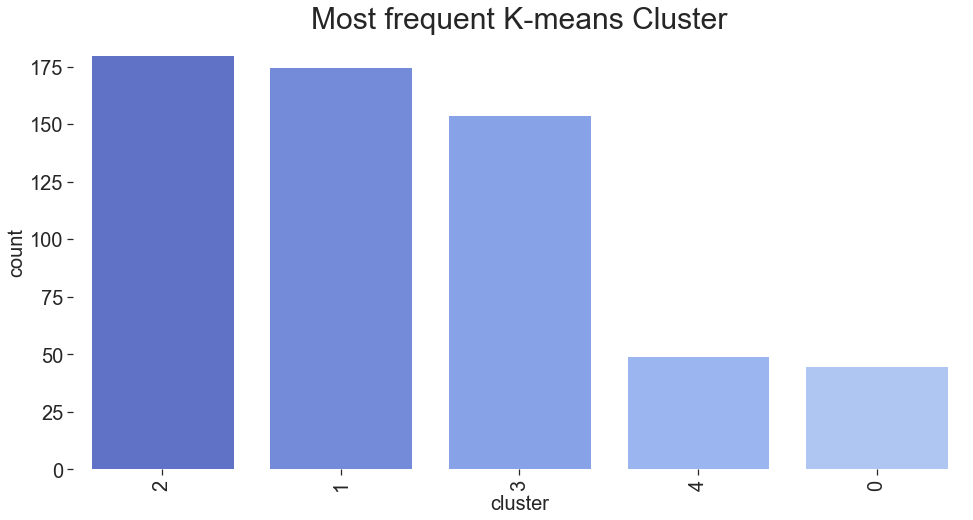

In [60]:
plt.figure(figsize=(16,8))
plt.title('Most frequent K-means Cluster',fontsize=30)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.cluster,order=pd.value_counts(data.cluster).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

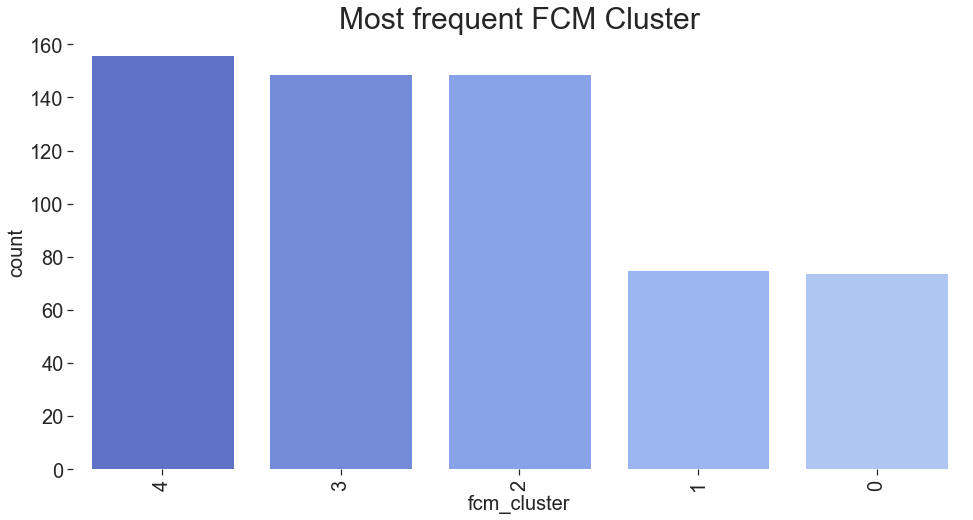

In [62]:
plt.figure(figsize=(16,8))
plt.title('Most frequent FCM Cluster',fontsize=30)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.fcm_cluster,order=pd.value_counts(data.fcm_cluster).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()